In [1]:
import sys
import os
cwd = os.getcwd()
sourcedir = os.sep.join(cwd.split(os.sep)[:-3])
sys.path.append(os.path.join(sourcedir, "helao-async"))
sys.path.append(os.path.join(sourcedir, "helao-core"))

from glob import glob
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from helao.helpers.read_hlo import HelaoData

# CO2 sensor acquisitions from a single sequence

In [5]:
seqzip_path = "data/130047__CCSI_validation_KOH_procedure__nolabel.zip"

#### load data parser with path to sequence zip, helao yml, or any directory containing a helao yml

In [6]:
hd = HelaoData(seqzip_path)

#### use HelaoData.ls attribute to list child object representations with index

In [6]:
hd.ls

sequence: CCSI_validation_KOH_procedure @ 2023-01-11 13:00:47.721959 CONTAINING 12 children
  [0] experiment: CCSI_sub_liquidfill_syringes @ 2023-01-11 13:00:48.768959 CONTAINING 22 children
  [1] experiment: CCSI_sub_drain_and_clean @ 2023-01-11 13:06:26.668959 CONTAINING 26 children
  [2] experiment: CCSI_sub_headspace_purge_and_measure @ 2023-01-11 13:08:52.875959 CONTAINING 17 children
  [3] experiment: CCSI_sub_peripumpoff @ 2023-01-11 13:10:02.748959 CONTAINING 1 children
  [4] experiment: CCSI_sub_liquidfill_syringes @ 2023-01-11 13:10:03.492959 CONTAINING 22 children
  [5] experiment: CCSI_sub_drain_and_clean @ 2023-01-11 13:15:41.062959 CONTAINING 26 children
  [6] experiment: CCSI_sub_headspace_purge_and_measure @ 2023-01-11 13:18:08.206959 CONTAINING 17 children
  [7] experiment: CCSI_sub_peripumpoff @ 2023-01-11 13:19:17.896959 CONTAINING 1 children
  [8] experiment: CCSI_sub_liquidfill_syringes @ 2023-01-11 13:19:18.616959 CONTAINING 22 children
  [9] experiment: CCSI_sub_

#### access an iterable list of experiment objects

In [7]:
hd.exp

[experiment: CCSI_sub_liquidfill_syringes @ 2023-01-11 13:00:48.768959 CONTAINING 22 children,
 experiment: CCSI_sub_drain_and_clean @ 2023-01-11 13:06:26.668959 CONTAINING 26 children,
 experiment: CCSI_sub_headspace_purge_and_measure @ 2023-01-11 13:08:52.875959 CONTAINING 17 children,
 experiment: CCSI_sub_peripumpoff @ 2023-01-11 13:10:02.748959 CONTAINING 1 children,
 experiment: CCSI_sub_liquidfill_syringes @ 2023-01-11 13:10:03.492959 CONTAINING 22 children,
 experiment: CCSI_sub_drain_and_clean @ 2023-01-11 13:15:41.062959 CONTAINING 26 children,
 experiment: CCSI_sub_headspace_purge_and_measure @ 2023-01-11 13:18:08.206959 CONTAINING 17 children,
 experiment: CCSI_sub_peripumpoff @ 2023-01-11 13:19:17.896959 CONTAINING 1 children,
 experiment: CCSI_sub_liquidfill_syringes @ 2023-01-11 13:19:18.616959 CONTAINING 22 children,
 experiment: CCSI_sub_drain_and_clean @ 2023-01-11 13:24:56.443959 CONTAINING 26 children,
 experiment: CCSI_sub_headspace_purge_and_measure @ 2023-01-11 1

#### find all experiments matching a given name

In [8]:
drain_exps = [x for x in hd.exp if x.name=="CCSI_sub_drain_and_clean"]

In [9]:
drain_exps

[experiment: CCSI_sub_drain_and_clean @ 2023-01-11 13:06:26.668959 CONTAINING 26 children,
 experiment: CCSI_sub_drain_and_clean @ 2023-01-11 13:15:41.062959 CONTAINING 26 children,
 experiment: CCSI_sub_drain_and_clean @ 2023-01-11 13:24:56.443959 CONTAINING 26 children]

#### list the child objects of one experiment, i.e. actions

In [10]:
drain_exps[0].ls

experiment: CCSI_sub_drain_and_clean @ 2023-01-11 13:06:26.668959 CONTAINING 26 children
  [0] action: pump @ 2023-01-11 13:06:26.766959 CONTAINING 0 children
  [1] action: liquidvalve @ 2023-01-11 13:07:12.551959 CONTAINING 0 children
  [2] action: wait @ 2023-01-11 13:07:13.238959 CONTAINING 0 children
  [3] action: infuse @ 2023-01-11 13:07:13.624959 CONTAINING 0 children
  [4] action: wait @ 2023-01-11 13:07:45.041959 CONTAINING 0 children
  [5] action: gasvalve @ 2023-01-11 13:07:45.482959 CONTAINING 0 children
  [6] action: wait @ 2023-01-11 13:07:46.172959 CONTAINING 0 children
  [7] action: withdraw @ 2023-01-11 13:08:16.335959 CONTAINING 0 children
  [8] action: wait @ 2023-01-11 13:08:17.768959 CONTAINING 0 children
  [9] action: liquidvalve @ 2023-01-11 13:08:18.185959 CONTAINING 0 children
  [10] action: wait @ 2023-01-11 13:08:18.852959 CONTAINING 0 children
  [11] action: wait @ 2023-01-11 13:06:27.475959 CONTAINING 0 children
  [12] action: gasvalve @ 2023-01-11 13:08:19

#### get action parameters (same attribute for seq and exp objects)

In [11]:
drain_exps[0].act[16].params

{'duration': 30, 'acquisition_rate': 1, 'action_version': 1}

In [12]:
drain_exps[0].params

{'Waterclean_volume_ul': 9000,
 'Syringe_retraction_ul': 70,
 'Syringe_rate_ulsec': 300,
 'LiquidFillWait_s': 15,
 'co2measure_duration': 30,
 'co2measure_acqrate': 1,
 'co2_ppm_thresh': 90000,
 'purge_if': 'below',
 'HSpurge_duration': 40}

#### list data files from action object

In [13]:
drain_exps[0].act[16].data_files

['20230111.130626668959__CCSI_sub_drain_and_clean/24__0__20230111.130821718959__CO2SENSOR__acquire_co2/CO2-24.24.0.0__0.hlo']

#### read data files from action object: hlo -> (metadict, datadict)

In [13]:
headerdict, datadict = drain_exps[0].act[16].data

In [14]:
headerdict

{'hlo_version': '2023.01.04',
 'action_name': 'CO2',
 'column_headings': ['epoch_s', 'co2_ppm'],
 'optional': {'scaling_factor': 10, 'init_co2_filtered': 7163},
 'epoch_ns': 1673471302152959654}

In [15]:
datadict['co2_ppm'][:20]

[81990,
 82670,
 85370,
 89120,
 92520,
 93410,
 93300,
 92300,
 90730,
 88160,
 87420,
 85370,
 83840,
 82670,
 82490,
 81610,
 80640,
 79620,
 79150,
 78680]

#### assemble all action data and convert dictionaries to dataframes

In [16]:
drain_co2_dfs = []

for exp in drain_exps:
    co2_act = [x for x in exp.act if x.name=="acquire_co2"][0]
    meta, data = co2_act.data
    df = pd.DataFrame(data)
    df["exp_name"] = exp.name
    df["act_name"] = co2_act.name
    df["act_datetime"] = co2_act.timestamp
    df["act_timestamp"] = datetime.strptime(co2_act.timestamp, "%Y-%m-%d %H:%M:%S.%f").timestamp()
    drain_co2_dfs.append(df)

In [17]:
fulldf = pd.concat(drain_co2_dfs, axis=0)

In [18]:
fulldf["action_time"] = fulldf.epoch_s - fulldf.act_timestamp

In [19]:
fulldf

,epoch_s,co2_ppm,exp_name,act_name,act_datetime,act_timestamp,action_time
0,1.673471e+09,81990,CCSI_sub_drain_and_clean,acquire_co2,2023-01-11 13:08:21.718959,1.673471e+09,0.361022
1,1.673471e+09,82670,CCSI_sub_drain_and_clean,acquire_co2,2023-01-11 13:08:21.718959,1.673471e+09,1.529022
2,1.673471e+09,85370,CCSI_sub_drain_and_clean,acquire_co2,2023-01-11 13:08:21.718959,1.673471e+09,2.713022
3,1.673471e+09,89120,CCSI_sub_drain_and_clean,acquire_co2,2023-01-11 13:08:21.718959,1.673471e+09,3.840022
4,1.673471e+09,92520,CCSI_sub_drain_and_clean,acquire_co2,2023-01-11 13:08:21.718959,1.673471e+09,5.011022
...,...,...,...,...,...,...,...
22,1.673472e+09,77140,CCSI_sub_drain_and_clean,acquire_co2,2023-01-11 13:26:51.683959,1.673472e+09,26.067022
23,1.673472e+09,76610,CCSI_sub_drain_and_clean,acquire_co2,2023-01-11 13:26:51.683959,1.673472e+09,27.235022
24,1.673472e+09,75800,CCSI_sub_drain_and_clean,acquire_co2,2023-01-11 13:26:51.683959,1.673472e+09,28.370022
25,1.673472e+09,75010,CCSI_sub_drain_and_clean,acquire_co2,2023-01-11 13:26:51.683959,1.673472e+09,29.489022


#### plot data series

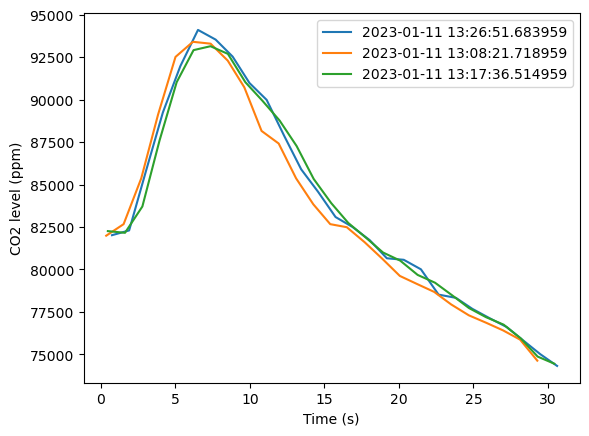

In [20]:
for udt in set(fulldf.act_datetime):
    subdf = fulldf[fulldf.act_datetime==udt]
    plt.plot(subdf['action_time'], subdf['co2_ppm'], label=udt)

plt.xlabel("Time (s)")
plt.ylabel("CO2 level (ppm)")
plt.legend();

# CO2 sensor acquisitions from multiple sequences

In [21]:
koh_seqs = [x for x in glob("data/*.zip") if "nolabel" not in x]

In [23]:
seq_dfs = []

for seqzip_path in koh_seqs:
    hd = HelaoData(seqzip_path)
    drain_exps = [x for x in hd.exp if x.name=="CCSI_sub_liquidfill_syringes"]
    drain_co2_dfs = []
    for exp in drain_exps:
        co2_act = [x for x in exp.act if x.name=="acquire_co2"][0]
        meta, data = co2_act.data
        df = pd.DataFrame(data)
        df["exp_name"] = exp.name
        df["act_name"] = co2_act.name
        df["act_datetime"] = co2_act.timestamp
        df["act_timestamp"] = datetime.strptime(co2_act.timestamp, "%Y-%m-%d %H:%M:%S.%f").timestamp()
        df["seq_name"] = hd.name
        df["seq_zip"] = os.path.basename(seqzip_path)
        drain_co2_dfs.append(df)
    fulldf = pd.concat(drain_co2_dfs, axis=0)
    seq_dfs.append(fulldf)

allseqdf = pd.concat(seq_dfs)
allseqdf["action_time"] = allseqdf.epoch_s - allseqdf.act_timestamp

In [24]:
set(allseqdf.act_datetime)

{'2023-01-11 15:12:38.995139',
 '2023-01-11 15:23:44.499139',
 '2023-01-11 15:34:51.320139',
 '2023-01-11 15:45:58.620795'}

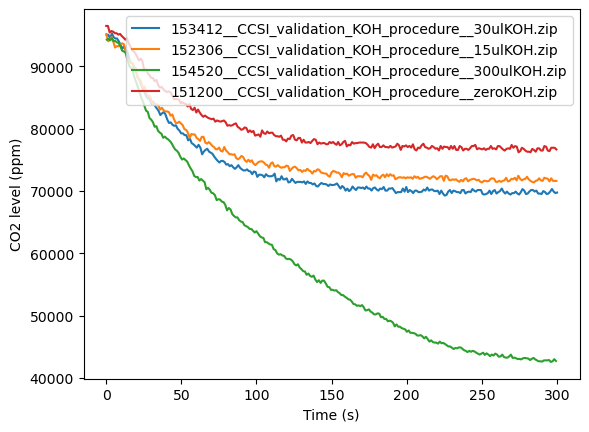

In [25]:
for udt in set(allseqdf.act_datetime):
    subdf = allseqdf[allseqdf.act_datetime==udt]
    plt.plot(subdf['action_time'], subdf['co2_ppm'], label=subdf.loc[0].seq_zip)

plt.xlabel("Time (s)")
plt.ylabel("CO2 level (ppm)")
plt.legend();